Final Project - Rohan Devraj

In [ ]:
Big Chances definition: A situation where a player should reasonably 
be expected to score usually in a one-on-one scenario or from very close range. [Opta Sports definition]

Which ability in a player, will correlate to creating more big chances for their team?

Purpose: Will help determine who's the best creative player to potentially 
    purchase, to help the team create goalscoring oppurtunities.

Hypothesis: If a player amasses a lot of assists for his team, then that player 
    will be creating a lot of big chances for his team.
    

Data: Data shows the career stats of the players, prior to the 2017/2018 season.
    

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection, metrics
from scipy import stats

In [115]:
main = pd.read_csv('football_data.csv', index_col=0)
main.head(20)

,Club,Position,Appearances,Clean Sheets,Goals,Wins,Losses,Goalkeeping,Saves,Penalties Saved,...,Duels Won,Duels Lost,Successful 0/0s,Successful 5/5s,Successful /s,Successful 50/50s,Aerial Battles Won,Aerial Battles Lost,Errors Leading To Goal,Own Goals
Rolando Aarons,Newcastle United,Midfielder,14,NaN,2,3,9,NaN,NaN,NaN,...,42,53,NaN,NaN,NaN,10.0,6.0,9.0,1.0,NaN
Tammy Abraham,Swansea City,Forward,7,NaN,1,1,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charlie Adam,Stoke City,Midfielder,196,NaN,33,64,78,NaN,NaN,NaN,...,955,"1,012",NaN,NaN,NaN,156.0,216.0,148.0,3.0,NaN
Adrián,West Ham United,Goalkeeper,106,29.0,0,38,38,NaN,367.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0
Ibrahim Afellay,Stoke City,Midfielder,43,NaN,2,17,16,NaN,NaN,NaN,...,137,134,NaN,NaN,50.0,NaN,15.0,20.0,0.0,NaN
Benik Afobe,AFC Bournemouth,Forward,50,NaN,10,16,24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sergio Agüero,Manchester City,Forward,186,NaN,127,117,33,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daniel Agyei,Burnley,Midfielder,3,NaN,0,0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soufyan Ahannach,Brighton and Hove Albion,Midfielder,0,NaN,0,0,0,NaN,NaN,NaN,...,0,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN
Ahmed Hegazi,West Bromwich Albion,Defender,5,3.0,1,2,1,NaN,NaN,NaN,...,19,16,NaN,0.0,NaN,NaN,14.0,12.0,1.0,0.0


In [116]:
# removes the commas from the numbers in the thousands

main = main.replace('\,','',regex=True)

In [117]:
# drops columns where all the entries are NaN
main.dropna(axis=1,how='all')

,Club,Position,Appearances,Clean Sheets,Goals,Wins,Losses,Saves,Penalties Saved,Punches,...,Duels Won,Duels Lost,Successful 0/0s,Successful 5/5s,Successful /s,Successful 50/50s,Aerial Battles Won,Aerial Battles Lost,Errors Leading To Goal,Own Goals
Rolando Aarons,Newcastle United,Midfielder,14,NaN,2,3,9,NaN,NaN,NaN,...,42,53,NaN,NaN,NaN,10.0,6.0,9.0,1.0,NaN
Tammy Abraham,Swansea City,Forward,7,NaN,1,1,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charlie Adam,Stoke City,Midfielder,196,NaN,33,64,78,NaN,NaN,NaN,...,955,1012,NaN,NaN,NaN,156.0,216.0,148.0,3.0,NaN
Adrián,West Ham United,Goalkeeper,106,29.0,0,38,38,367.0,5.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0
Ibrahim Afellay,Stoke City,Midfielder,43,NaN,2,17,16,NaN,NaN,NaN,...,137,134,NaN,NaN,50.0,NaN,15.0,20.0,0.0,NaN
Benik Afobe,AFC Bournemouth,Forward,50,NaN,10,16,24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sergio Agüero,Manchester City,Forward,186,NaN,127,117,33,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daniel Agyei,Burnley,Midfielder,3,NaN,0,0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soufyan Ahannach,Brighton and Hove Albion,Midfielder,0,NaN,0,0,0,NaN,NaN,NaN,...,0,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN
Ahmed Hegazi,West Bromwich Albion,Defender,5,3.0,1,2,1,NaN,NaN,NaN,...,19,16,NaN,0.0,NaN,NaN,14.0,12.0,1.0,0.0


In [118]:
main.columns

Index(['Club', 'Position', 'Appearances', 'Clean Sheets', 'Goals', 'Wins',
       'Losses', 'Goalkeeping', 'Saves', 'Penalties Saved', 'Punches',
       'High Claims', 'Catches', 'Sweeper Clearances', 'Throw Outs',
       'Goal Kicks', 'Attack', 'Goals Per Match', 'Goals With Header',
       'Goals With Right Foot', 'Goals With Left Foot', 'Penalties Scored',
       'Goals From Freekick', 'Shots', 'Shots On Target',
       'Shooting Accuracy %', 'Hit Woodwork', 'Big Chances Missed',
       'Team Play', 'Assists', 'Passes', 'Passes Per Match',
       'Big Chances Created', 'Crosses', 'Cross Accuracy %', 'Through Balls',
       'Accurate Long Balls', 'Discipline', 'Yellow Cards', 'Red Cards',
       'Fouls', 'Offsides', 'Defence', 'Goals Conceded', 'Tackles',
       'Tackle Success %', 'Last Man Tackles', 'Blocked Shots',
       'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances Off Line', 'Recoveries', 'Duels Won', 'Duels Lost',
       'Successful 0/0s', 'Successful 5

In [119]:

# we will look at assists, interceptions, crosses, and accurate long balls to prove our hypothesis.  

copy = main.copy()

# fill NaN's with zeroes, (assists and passes are already zero-filled)
copy['Big Chances Created'] = copy['Big Chances Created'].fillna(0)
copy['Accurate Long Balls'] = copy['Accurate Long Balls'].fillna(0)
copy['Crosses'] = copy['Crosses'].fillna(0)
copy['Interceptions'] = copy['Interceptions'].fillna(0)

# make sure all columns are valid integers
copy['Assists'] = pd.to_numeric(copy['Assists'])
copy['Accurate Long Balls'] = pd.to_numeric(copy['Accurate Long Balls'])
copy['Crosses'] = pd.to_numeric(copy['Crosses'])
copy['Interceptions'] = pd.to_numeric(copy['Interceptions'])
copy['Big Chances Created'] = pd.to_numeric(copy['Big Chances Created'])


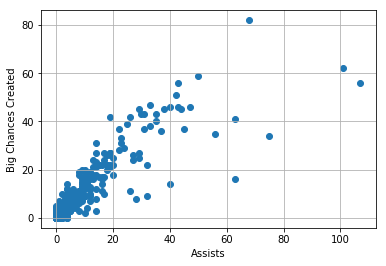

In [120]:
# Big chances vs Assists

x = copy['Assists']

y = copy['Big Chances Created']


plt.scatter(x, y)
plt.xlabel('Assists')
plt.ylabel('Big Chances Created')
plt.grid()


In [121]:
copy_assists_int, copy_assists_slope = np.polynomial.polynomial.polyfit(x, y, 1)

In [122]:
copy_assists_int

1.325256361354329

In [123]:
copy_assists_slope

0.8523542333022546

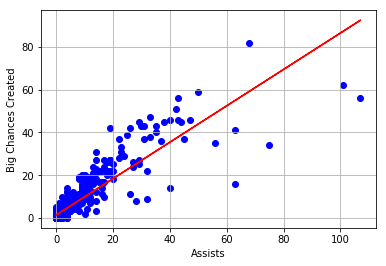

In [124]:
# 4 REGRESSIONS PLOTS TO SEE WHICH ABILITY CORRELATES TO MORE BIG CHANCES CREATED

assist_reg = x*copy_assists_slope + copy_assists_int

# plot of data and linear regression model
plt.scatter(x,y,color='blue')
plt.plot(x, assist_reg,color='red')
plt.xlabel('Assists')
plt.ylabel('Big Chances Created')
plt.grid()

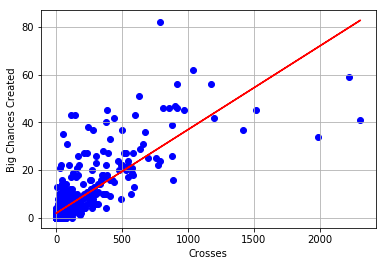

In [29]:
# Big chances vs Crosses

x = copy['Crosses']

y = copy['Big Chances Created']

copy_crosses_int, copy_crosses_slope = np.polynomial.polynomial.polyfit(x, y, 1)

crosses_reg = x*copy_crosses_slope + copy_crosses_int

# plot of data and linear regression model
plt.scatter(x,y,color='blue')
plt.plot(x, crosses_reg,color='red')
plt.xlabel('Crosses')
plt.ylabel('Big Chances Created')
plt.grid()



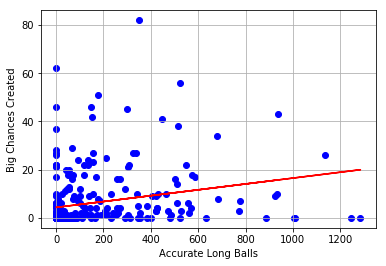

In [125]:
# Big chances vs Accurate Long Balls

x = test['Accurate Long Balls']

y = test['Big Chances Created']

test_balls_int, test_balls_slope = np.polynomial.polynomial.polyfit(x, y, 1)

balls_reg = x*test_balls_slope + test_balls_int

# plot of data and linear regression model
plt.scatter(x,y,color='blue')
plt.plot(x, balls_reg,color='red')
plt.xlabel('Accurate Long Balls')
plt.ylabel('Big Chances Created')
plt.grid()


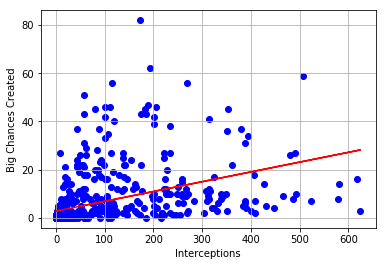

In [127]:
# Big chances vs Interceptions

x = copy['Interceptions']

y = copy['Big Chances Created']

copy_interceptions_int, copy_interceptions_slope = np.polynomial.polynomial.polyfit(x, y, 1)

interceptions_reg = x*copy_interceptions_slope + copy_interceptions_int

# plot of data and linear regression model
plt.scatter(x,y,color='blue')
plt.plot(x, interceptions_reg,color='red')
plt.xlabel('Interceptions')
plt.ylabel('Big Chances Created')
plt.grid()

In [128]:
# Validation

train = copy[:313]
train

,Club,Position,Appearances,Clean Sheets,Goals,Wins,Losses,Goalkeeping,Saves,Penalties Saved,...,Duels Won,Duels Lost,Successful 0/0s,Successful 5/5s,Successful /s,Successful 50/50s,Aerial Battles Won,Aerial Battles Lost,Errors Leading To Goal,Own Goals
Rolando Aarons,Newcastle United,Midfielder,14,NaN,2,3,9,NaN,NaN,NaN,...,42,53,NaN,NaN,NaN,10.0,6.0,9.0,1.0,NaN
Tammy Abraham,Swansea City,Forward,7,NaN,1,1,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charlie Adam,Stoke City,Midfielder,196,NaN,33,64,78,NaN,NaN,NaN,...,955,1012,NaN,NaN,NaN,156.0,216.0,148.0,3.0,NaN
Adrián,West Ham United,Goalkeeper,106,29.0,0,38,38,NaN,367.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0
Ibrahim Afellay,Stoke City,Midfielder,43,NaN,2,17,16,NaN,NaN,NaN,...,137,134,NaN,NaN,50.0,NaN,15.0,20.0,0.0,NaN
Benik Afobe,AFC Bournemouth,Forward,50,NaN,10,16,24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sergio Agüero,Manchester City,Forward,186,NaN,127,117,33,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daniel Agyei,Burnley,Midfielder,3,NaN,0,0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soufyan Ahannach,Brighton and Hove Albion,Midfielder,0,NaN,0,0,0,NaN,NaN,NaN,...,0,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN
Ahmed Hegazi,West Bromwich Albion,Defender,5,3.0,1,2,1,NaN,NaN,NaN,...,19,16,NaN,0.0,NaN,NaN,14.0,12.0,1.0,0.0


In [129]:
test = copy[314:]
test

,Club,Position,Appearances,Clean Sheets,Goals,Wins,Losses,Goalkeeping,Saves,Penalties Saved,...,Duels Won,Duels Lost,Successful 0/0s,Successful 5/5s,Successful /s,Successful 50/50s,Aerial Battles Won,Aerial Battles Lost,Errors Leading To Goal,Own Goals
Vincent Kompany,Manchester City,Defender,234,84.0,16,139,47,NaN,NaN,NaN,...,1127,701,NaN,NaN,NaN,92.0,412.0,197.0,2.0,3.0
Laurent Koscielny,Arsenal,Defender,216,81.0,17,126,41,NaN,NaN,NaN,...,1139,706,NaN,NaN,NaN,47.0,573.0,392.0,2.0,2.0
Cheikhou Kouyaté,West Ham United,Midfielder,99,NaN,10,33,34,NaN,NaN,NaN,...,717,534,NaN,NaN,NaN,77.0,271.0,174.0,1.0,NaN
Tim Krul,Brighton and Hove Albion,Goalkeeper,157,41.0,0,55,69,NaN,453.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,0.0
Grzegorz Krychowiak,West Bromwich Albion,Midfielder,2,NaN,0,0,1,NaN,NaN,NaN,...,15,4,NaN,NaN,NaN,2.0,6.0,0.0,0.0,NaN
Alexandre Lacazette,Arsenal,Forward,5,NaN,2,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Lallana,Liverpool,Midfielder,156,NaN,29,65,46,NaN,NaN,NaN,...,789,967,NaN,NaN,NaN,192.0,102.0,215.0,0.0,NaN
Erik Lamela,Tottenham Hotspur,Midfielder,85,NaN,8,42,20,NaN,NaN,NaN,...,420,578,NaN,NaN,NaN,119.0,22.0,77.0,0.0,NaN
Manuel Lanzini,West Ham United,Midfielder,62,NaN,14,23,22,NaN,NaN,NaN,...,297,253,NaN,NaN,NaN,145.0,8.0,25.0,0.0,NaN
Jamaal Lascelles,Newcastle United,Defender,23,5.0,4,6,12,NaN,NaN,NaN,...,81,45,NaN,NaN,NaN,3.0,56.0,25.0,1.0,0.0


In [130]:
# Validating the Big Chances Created vs Assists model

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(train['Assists'],train['Big Chances Created']) 

In [131]:
train_regr = intercept + slope * train['Assists']

In [132]:
metrics.r2_score(train['Big Chances Created'], train_regr)

0.7401038153842248

In [133]:
metrics.mean_absolute_error(train['Big Chances Created'], train_regr)

3.001963011971649

In [134]:
metrics.r2_score(test['Big Chances Created'], intercept + slope*test['Assists'])

0.8227295539722054

In [135]:
metrics.mean_absolute_error(test['Big Chances Created'], slope*test['Assists'])

2.391442613063414

# So we see that the R2 score got closer to 1, and the MAE reduced in size. Good signs for the model as the data improved
# on our test data.

In [136]:
# Validating the Big Chances Created vs Crosses model
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(train['Crosses'],train['Big Chances Created']) 


In [137]:
train_regr2 = intercept + slope * train['Crosses']
metrics.r2_score(train['Big Chances Created'], train_regr2)


0.6848883597946165

In [138]:
metrics.mean_absolute_error(train['Big Chances Created'], train_regr2)

3.518441154171859

In [139]:
metrics.r2_score(test['Big Chances Created'], intercept + slope*test['Crosses'])

0.5989212975778506

In [140]:
metrics.mean_absolute_error(test['Big Chances Created'], slope*test['Crosses'])

3.0808436358910476

In [75]:
# Validating the Big Chances Created vs Accurate Long Balls model
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(train['Accurate Long Balls'],train['Big Chances Created']) 

In [141]:
train_regr3 = intercept + slope * train['Accurate Long Balls']
metrics.r2_score(train['Big Chances Created'], train_regr3)

-0.7567838535664397

In [142]:
metrics.mean_absolute_error(train['Big Chances Created'], train_regr3)

7.585333730113596

In [143]:
metrics.r2_score(test['Big Chances Created'], intercept + slope*test['Accurate Long Balls'])

-0.16875459823151395

In [144]:
metrics.mean_absolute_error(test['Big Chances Created'], slope*test['Accurate Long Balls'])

6.492019778898161

In [145]:
# Validating the Big Chances Created vs Interceptions model
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(train['Interceptions'],train['Big Chances Created']) 

In [146]:
train_regr4= intercept + slope * train['Interceptions']
metrics.r2_score(train['Big Chances Created'], train_regr4)

0.24278898621317524

In [147]:
metrics.mean_absolute_error(train['Big Chances Created'], train_regr4)

5.458630066227487

In [148]:
metrics.r2_score(test['Big Chances Created'], intercept + slope*test['Interceptions'])

0.1424747399602333

In [149]:
metrics.mean_absolute_error(test['Big Chances Created'], slope*test['Interceptions'])

5.099040878690815

In [150]:
#Checking how Big Chances created correlates with the 4 different statistics
(copy['Big Chances Created'].corr(copy['Assists']))


0.8871638696925591

In [151]:
(copy['Big Chances Created'].corr(copy['Interceptions']))

0.43577723766527665

In [152]:
(copy['Big Chances Created'].corr(copy['Accurate Long Balls']))

0.2413742352615928

In [153]:
(copy['Big Chances Created'].corr(copy['Crosses']))

0.7992220645107316

# So we see here that a player who can amass a lot of assists and cross the ball a lot, will contribute to creating more
# big chances for their team.

In [154]:
# Table below shows the players who create the most big chances and shows the number of crosses and assists they amass
copy[['Big Chances Created', 'Assists', 'Crosses']].sort_values(by = "Big Chances Created", ascending = False).head(10)

,Big Chances Created,Assists,Crosses
David Silva,82.0,68,788
Wayne Rooney,62.0,101,1035
Leighton Baines,59.0,50,2221
Juan Mata,56.0,43,919
Cesc Fàbregas,56.0,107,1174
Mesut Özil,51.0,42,632
Gylfi Sigurdsson,47.0,33,904
Aaron Lennon,46.0,47,915
Theo Walcott,46.0,43,809
Christian Eriksen,46.0,40,858


In [ ]:
# So these players amass a lot of assists and crosses and create a lot of big chances for their team. 
# These are ideally the players you want to scout for buying, to help your team
# create goalscoring oppurtunities and big chances.